In [22]:
import os
from autogen import ConversableAgent


## Two-Agent Chat and Chat Result

Two-Agent Chat is kind of input a query and ask two agents to act a student teracher relationship. One agent will act like a student to ask the question and the other teacher agent will answer. The student can question closely and the teacher will answer more about the following questions. In the end, the agents will summarise the core of the dialogue and output.

## 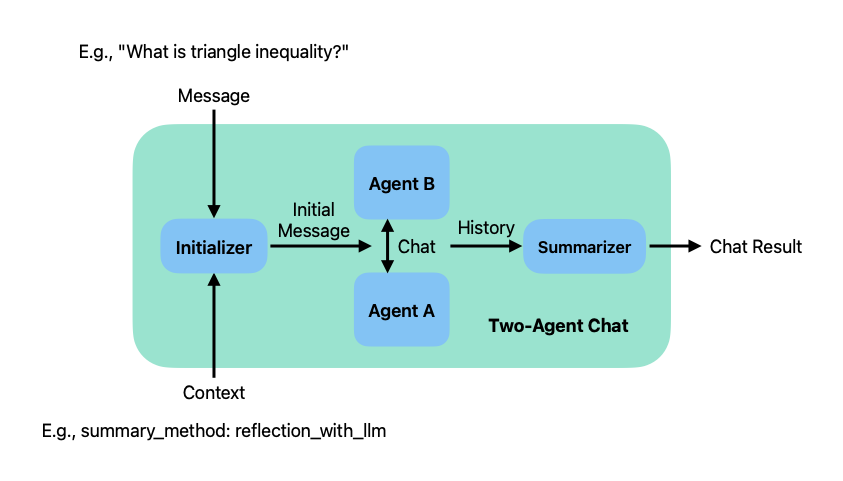

In [ ]:
import os
from autogen import ConversableAgent

# print(os.environ["OPENAI_API_KEY"])

student_agent = ConversableAgent(
    name="Student_Agent",
    system_message="You are a student willing to learn.",
    llm_config={"config_list": [{"model": "gpt-4o", "api_key": os.environ["OPENAI_API_KEY"]}]},
)
teacher_agent = ConversableAgent(
    name="Teacher_Agent",
    system_message="You are a math teacher.",
    llm_config={"config_list": [{"model": "gpt-4o", "api_key": os.environ["OPENAI_API_KEY"]}]},
)

chat_result = student_agent.initiate_chat(
    teacher_agent,
    message="What is triangle inequality?",
    summary_method="reflection_with_llm",
    max_turns=2,
)

sk-oyQkwNZPY1mV-XbIkengNaoKyVQHzoMgm2b2EubJETT3BlbkFJnObGk5v8r6SBj3BFfENefyjuZMRAZBSH6lxnt25N8A
Student_Agent (to Teacher_Agent):

What is triangle inequality?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Teacher_Agent (to Student_Agent):



The triangle inequality is a fundamental concept in geometry that relates to the lengths of the sides of a triangle. It states that for any triangle, the sum of the lengths of any two sides must be greater than or equal to the length of the third side. This can be expressed in three inequalities for a triangle with sides of lengths \( a \), \( b \), and \( c \):

1. \( a + b \geq c \)
2. \( a + c \geq b \)
3. \( b + c \geq a \)

These inequalities ensure that the given side lengths can form a valid triangle. If any of these inequalities are not true, the side lengths do not form a triangle. The triangle inequality also has important applications beyond geometry, including in various areas of mathematics such as analysis and metric spaces.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Student_Agent (to Teacher_Agent):

Do you have any example to help me understand the triangle inequality better?

-------------------------

In [ ]:
# Use default summary prompt to summarize the history conversation and 
print(ConversableAgent.DEFAULT_SUMMARY_PROMPT) # The prompt used to summary the chats
print(chat_result.summary)

# Get the chat history.
import pprint

# pprint.pprint(chat_result.chat_history) # This will give the history chats.
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-4o-2024-08-06': {'completion_tokens': 833,
                                                            'cost': 0.0182825,
                                                            'prompt_tokens': 3981,
                                                            'total_tokens': 4814},
                                      'total_cost': 0.0182825},
 'usage_including_cached_inference': {'gpt-4o-2024-08-06': {'completion_tokens': 1251,
                                                            'cost': 0.023555,
                                                            'prompt_tokens': 4418,
                                                            'total_tokens': 5669},
                                      'total_cost': 0.023555}}


### Sequential Chats

Consists of multiple two-agent modes in series, the input of second two-agent is the output of the first two-agent. This mechanism is called "carryover". 

In traffic flow theory, the carryover mechanism models the persistence and continuity of traffic flow. Different traffic flows, road conditions, speeds, and other factors affect the traffic flow, and these effects are not limited to immediate feedback, but may also continue into future periods. Example:

Speed impact: the speed of vehicles ahead may affect the speed and flow of subsequent vehicles. Current traffic signals, speeds, or traffic conditions (e.g., congestion) can affect traffic flow in subsequent periods. This effect can ‘carry over’ to the next period.

Queuing: Changes in traffic signals or road congestion lead to queuing effects, which can affect the traffic flow in the next cycle. Delays or congestion in one period can continue into the next, affecting overall traffic efficiency.

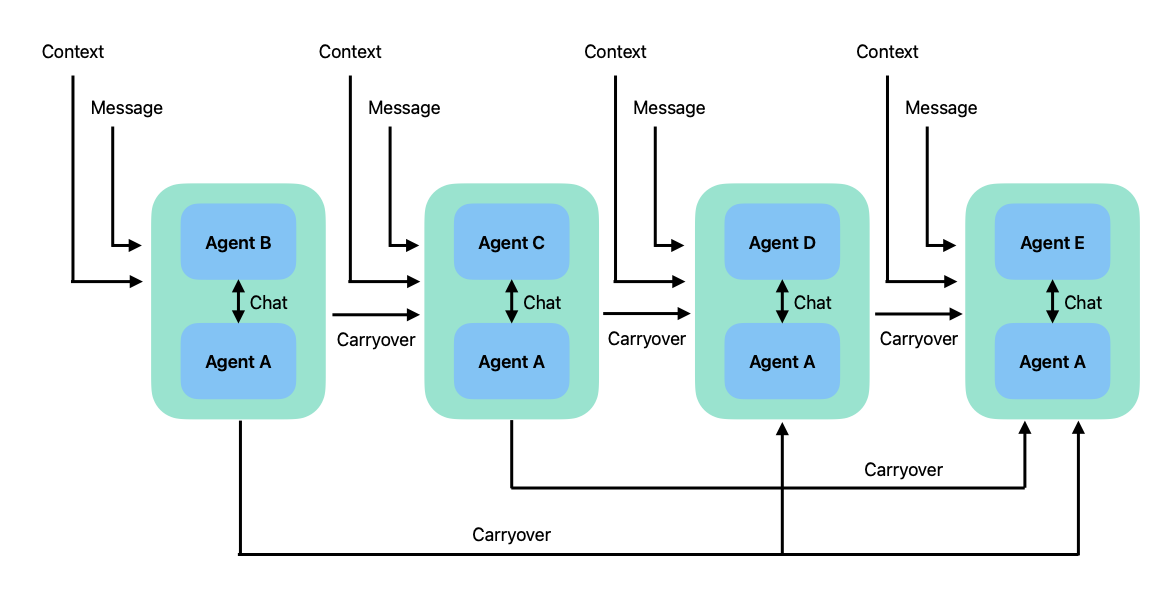

In [ ]:
# The Number Agent always returns the same numbers.
number_agent = ConversableAgent(
    name="Number_Agent",
    system_message="You return me the numbers I give you, one number each line.",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

# The Adder Agent adds 1 to each number it receives.
adder_agent = ConversableAgent(
    name="Adder_Agent",
    system_message="You add 1 to each number I give you and return me the new numbers, one number each line.",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

# The Multiplier Agent multiplies each number it receives by 2.
multiplier_agent = ConversableAgent(
    name="Multiplier_Agent",
    system_message="You multiply each number I give you by 2 and return me the new numbers, one number each line.",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

# The Subtracter Agent subtracts 1 from each number it receives.
subtracter_agent = ConversableAgent(
    name="Subtracter_Agent",
    system_message="You subtract 1 from each number I give you and return me the new numbers, one number each line.",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

# The Divider Agent divides each number it receives by 2.
divider_agent = ConversableAgent(
    name="Divider_Agent",
    system_message="You divide each number I give you by 2 and return me the new numbers, one number each line.",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)
# Start a sequence of two-agent chats.
# Each element in the list is a dictionary that specifies the arguments
# for the initiate_chat method.
chat_results = number_agent.initiate_chats(
    [
        {
            "recipient": adder_agent,
            "message": "14",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
        {
            "recipient": multiplier_agent,
            "message": "These are my numbers",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
        {
            "recipient": subtracter_agent,
            "message": "These are my numbers",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
        {
            "recipient": divider_agent,
            "message": "These are my numbers",
            "max_turns": 2,
            "summary_method": "last_msg",
        },
    ]
)


********************************************************************************
Starting a new chat....

********************************************************************************
Number_Agent (to Adder_Agent):

14

--------------------------------------------------------------------------------
Adder_Agent (to Number_Agent):

15

--------------------------------------------------------------------------------
Number_Agent (to Adder_Agent):

15

--------------------------------------------------------------------------------
Adder_Agent (to Number_Agent):

16

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
Number_Agent (to Multiplier_Agent):

These are my numbers
Context: 
16

--------------------------------------------------------------------------------
Mul

In [32]:
print("First Chat Summary: ", chat_results[0].summary)
print("Second Chat Summary: ", chat_results[1].summary)
print("Third Chat Summary: ", chat_results[2].summary)
print("Fourth Chat Summary: ", chat_results[3].summary)

First Chat Summary:  16
Second Chat Summary:  64
Third Chat Summary:  15
63
Fourth Chat Summary:  4
16
3.75
15.75


## Group Chat

A group will contain more than two agents, all the agents will be involved into the single chat and share the context.

Group chats are coordinated by a special type of agent `GroupChatManager`. Firstly the group-chat-manager will choose one agent to speak. The selected agent speaker speak then the speak will be sent back the the group-chat-manager and then the manager will broadcasts the message to all other agents. This will repeat until the chat ends.

Their many ways to choose the agent:

- `round_robin`: The Group Chat Manager selects agents in a round-robin fashion based on the order of the agents provided.
- `random`: The Group Chat Manager selects agents randomly.
- `manual`: The Group Chat Manager selects agents by asking for human input.
- `auto`: The default strategy, which selects agents using the Group Chat Manager’s LLM.

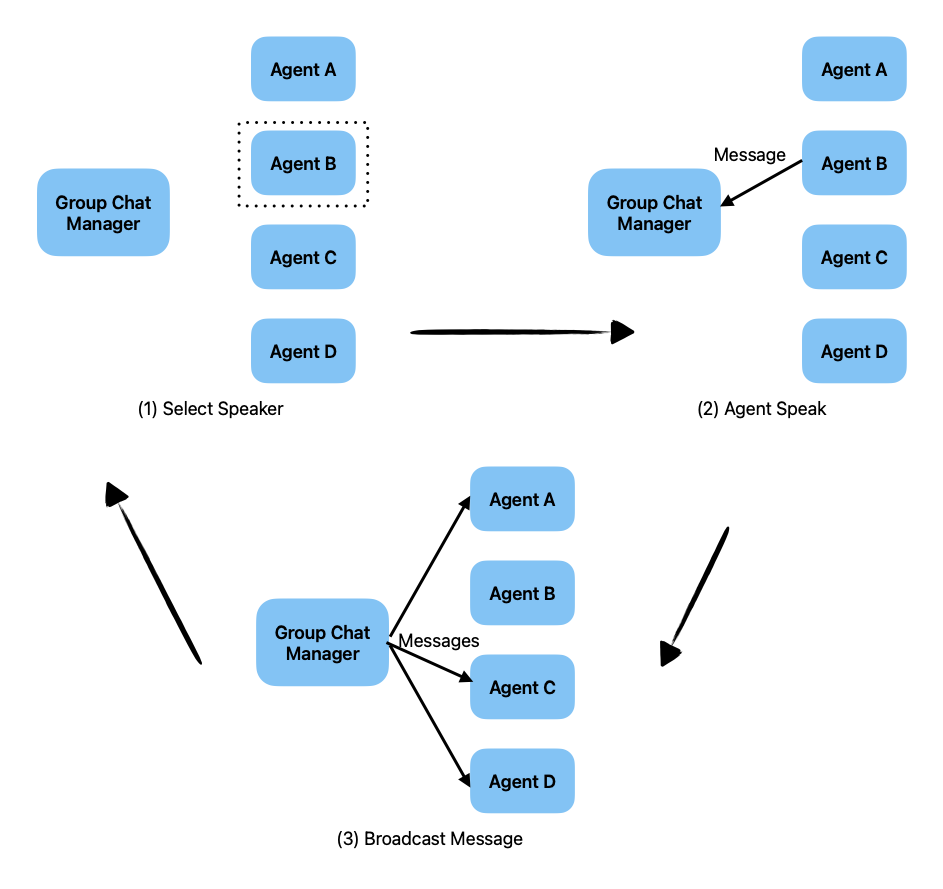

In [33]:
# The `description` attribute is a string that describes the agent.
# It can also be set in `ConversableAgent` constructor.
adder_agent.description = "Add 1 to each input number."
multiplier_agent.description = "Multiply each input number by 2."
subtracter_agent.description = "Subtract 1 from each input number."
divider_agent.description = "Divide each input number by 2."
number_agent.description = "Return the numbers given."

from autogen import GroupChat

group_chat = GroupChat(
    agents=[adder_agent, multiplier_agent, subtracter_agent, divider_agent, number_agent],
    messages=[],
    max_round=6,
)

from autogen import GroupChatManager

group_chat_manager = GroupChatManager(
    groupchat=group_chat,
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
)

chat_result = number_agent.initiate_chat(
    group_chat_manager,
    message="My number is 3, I want to turn it into 13.",
    summary_method="reflection_with_llm",
)

Number_Agent (to chat_manager):

My number is 3, I want to turn it into 13.

--------------------------------------------------------------------------------

Next speaker: Multiplier_Agent

Multiplier_Agent (to chat_manager):

6

--------------------------------------------------------------------------------

Next speaker: Adder_Agent

Adder_Agent (to chat_manager):

7

--------------------------------------------------------------------------------

Next speaker: Multiplier_Agent

Multiplier_Agent (to chat_manager):

14

--------------------------------------------------------------------------------

Next speaker: Subtracter_Agent

Subtracter_Agent (to chat_manager):

13

--------------------------------------------------------------------------------

Next speaker: Number_Agent

Number_Agent (to chat_manager):

15

--------------------------------------------------------------------------------



Each message in the chat sequence has a `role` attribute that is typically `user`, `assistant`, or `system`. The select speaker message is the last in the chat sequence when used and, by default, has a role of `system`.

When using some models, such as Mistral through Mistral.AI’s API, the role on the last message in the chat sequence has to be `user`.

To change the default behaviour, Autogen provides a way to set the value of the select speaker message’s role to any string value by setting the `role_for_select_speaker_messages` parameter in the GroupChat’s constructor. The default value is system and by setting it to user you can accommodate the last message role requirement of Mistral.AI’s API.

In [37]:
group_chat_with_introductions = GroupChat(
    agents=[adder_agent, multiplier_agent, subtracter_agent, divider_agent, number_agent],
    messages=[],
    max_round=6,
    send_introductions=True,
)

# Let's use the group chat with introduction messages created above.
group_chat_manager_with_intros = GroupChatManager(
    groupchat=group_chat_with_introductions,
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
)

# Start a sequence of two-agent chats between the number agent and
# the group chat manager.
chat_result = number_agent.initiate_chats(
    [
        {
            "recipient": group_chat_manager_with_intros,
            "message": "My number is 3, I want to turn it into 13.",
        },
        {
            "recipient": group_chat_manager_with_intros,
            "message": "Turn this number to 32.",
        },
    ]
)


********************************************************************************
Starting a new chat....

********************************************************************************
Number_Agent (to chat_manager):

My number is 3, I want to turn it into 13.

--------------------------------------------------------------------------------

Next speaker: Multiplier_Agent



/home/henry/miniconda3/envs/Agent/lib/python3.12/site-packages/autogen/agentchat/chat.py:53: UserWarning: Repetitive recipients detected: The chat history will be cleared by default if a recipient appears more than once. To retain the chat history, please set 'clear_history=False' in the configuration of the repeating agent.
  warnings.warn(


Multiplier_Agent (to chat_manager):

6

--------------------------------------------------------------------------------

Next speaker: Adder_Agent

Adder_Agent (to chat_manager):

4

--------------------------------------------------------------------------------

Next speaker: Multiplier_Agent

Multiplier_Agent (to chat_manager):

8

--------------------------------------------------------------------------------

Next speaker: Adder_Agent

Adder_Agent (to chat_manager):

5

--------------------------------------------------------------------------------

Next speaker: Multiplier_Agent

Multiplier_Agent (to chat_manager):

10

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
Number_Agent (to chat_manager):

Turn this number to 32.
Context: 
10

-----------------------

## Nested Chat

In [41]:
import tempfile

temp_dir = tempfile.gettempdir()

arithmetic_agent = ConversableAgent(
    name="Arithmetic_Agent",
    llm_config=False,
    human_input_mode="ALWAYS",
    # This agent will always require human input to make sure the code is
    # safe to execute.
    code_execution_config={"use_docker": False, "work_dir": temp_dir},
)

code_writer_agent = ConversableAgent(
    name="Code_Writer_Agent",
    system_message="You are a code writer. You write Python script in Markdown code blocks.",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)

poetry_agent = ConversableAgent(
    name="Poetry_Agent",
    system_message="You are an AI poet.",
    llm_config={"config_list": [{"model": "gpt-4", "api_key": os.environ["OPENAI_API_KEY"]}]},
    human_input_mode="NEVER",
)


nested_chats = [
    {
        "recipient": group_chat_manager_with_intros,
        "summary_method": "reflection_with_llm",
        "summary_prompt": "Summarize the sequence of operations used to turn " "the source number into target number.",
    },
    {
        "recipient": code_writer_agent,
        "message": "Write a Python script to verify the arithmetic operations is correct.",
        "summary_method": "reflection_with_llm",
    },
    {
        "recipient": poetry_agent,
        "message": "Write a poem about it.",
        "max_turns": 1,
        "summary_method": "last_msg",
    },
]

arithmetic_agent.register_nested_chats(
    nested_chats,
    # The trigger function is used to determine if the agent should start the nested chat
    # given the sender agent.
    # In this case, the arithmetic agent will not start the nested chats if the sender is
    # from the nested chats' recipient to avoid recursive calls.
    trigger=lambda sender: sender not in [group_chat_manager_with_intros, code_writer_agent, poetry_agent],
)

# Instead of using `initiate_chat` method to start another conversation,
# we can use the `generate_reply` method to get single reply to a message directly.
reply = arithmetic_agent.generate_reply(
    messages=[{"role": "user", "content": "I have a number 3 and I want to turn it into 7."}]
)




>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

********************************************************************************
Starting a new chat....

********************************************************************************
Arithmetic_Agent (to chat_manager):

I have a number 3 and I want to turn it into 7.

--------------------------------------------------------------------------------

Next speaker: Adder_Agent

Adder_Agent (to chat_manager):

4

--------------------------------------------------------------------------------

Next speaker: Number_Agent

Number_Agent (to chat_manager):

5

--------------------------------------------------------------------------------

Next speaker: Adder_Agent

Adder_Agent (to chat_manager):

6

--------------------------------------------------------------------------------

Next speaker: Adder_Agent

Adder_Agent (to chat_manager):

7

--------------------------------------------------------------------------------

N